In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , LabelEncoder 
import warnings 
warnings .filterwarnings('ignore')

 1. Data Exploration and Preprocessing:


In [3]:
df= pd.read_csv("airbnb_data.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


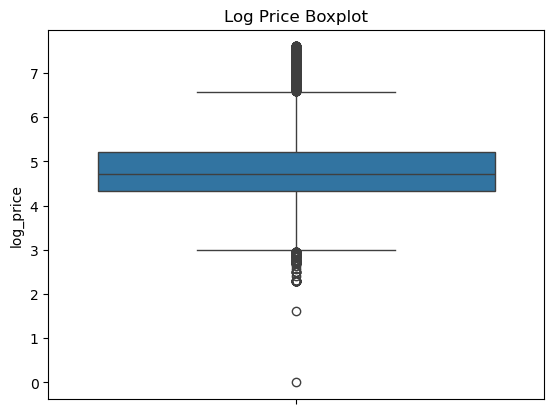

In [10]:
# for the outlier detection we plot a box plot here 
sns.boxplot(df['log_price'])
plt.title('Log Price Boxplot')
plt.show()

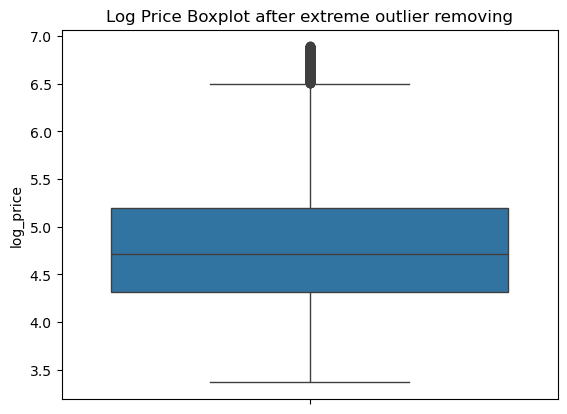

In [12]:
lower_bound = df['log_price'].quantile(0.01)
upper_bound = df['log_price'].quantile(0.99)

# Filter the data using quantile function 
df = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]
sns.boxplot(df['log_price'])
plt.title('Log Price Boxplot after extreme outlier removing')
plt.show()

In [14]:

# we can drop the non-important column that may not contribute to the model hence with more null values 
df.drop(['id','thumbnail_url', 'description', 'name', 'host_since', 'last_review', 'first_review' ,'host_has_profile_pic', 'host_identity_verified'
         , 'instant_bookable'], axis=1, inplace=True)



# Filling the important features with numercial and for non null values 
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)
df['cleaning_fee'].fillna(0, inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)


In [16]:
df['has_wifi'] = df['amenities'].str.contains('Wifi', case=False)
df['has_kitchen'] = df['amenities'].str.contains('Kitchen', case=False)
df['has_ac'] = df['amenities'].str.contains('Air conditioning', case=False)
df.drop('amenities', axis=1, inplace=True)


In [18]:
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'zipcode']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [20]:
df['cleaning_fee'] = df['cleaning_fee'].astype(int)


In [22]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['host_response_rate']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [24]:
neighbourhood_reviews = df.groupby('neighbourhood')['number_of_reviews'].mean()

# Map it back as a new column
df['neighbourhood_popularity'] = df['neighbourhood'].map(neighbourhood_reviews)
df.drop('neighbourhood', axis=1, inplace=True)


In [26]:
df['neighbourhood_popularity'] = df['neighbourhood_popularity'].fillna(0)


In [28]:
num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
            'number_of_reviews', 'review_scores_rating',
            'neighbourhood_popularity', 'latitude', 'longitude']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [30]:
# checking again for not null values 
df.isnull().sum()

log_price                                                 0
accommodates                                              0
bathrooms                                                 0
cleaning_fee                                              0
host_response_rate                                        0
                                                         ..
zipcode_94401                                             0
zipcode_95202\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n94158    0
zipcode_99135                                             0
zipcode_Near 91304                                        0
neighbourhood_popularity                                  0
Length: 727, dtype: int64

 2. Model Development

In [33]:
x = df.drop(['log_price'], axis=1)
y = df['log_price']


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

 3. Model Evaluation :


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, X_test, y_test):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R²: {r2:.4f}')


In [56]:
print("Linear Regression:")
evaluate(lr, x_test, y_test)

print("\nRandom Forest:")
evaluate(rf, x_test, y_test)

print("\nXGBoost:")
evaluate(xgb, x_test, y_test)


Linear Regression:
RMSE: 7925261.5736
MAE: 80603.2812
R²: -142607216307643.0938

Random Forest:
RMSE: 0.3669
MAE: 0.2706
R²: 0.6944

XGBoost:
RMSE: 0.3652
MAE: 0.2735
R²: 0.6972


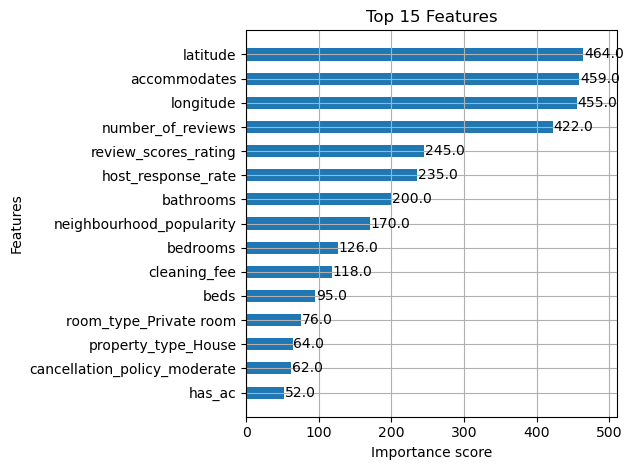

In [57]:
from xgboost import plot_importance


plot_importance(xgb, max_num_features=15, height=0.5, importance_type='weight')
plt.title("Top 15 Features")
plt.tight_layout()
plt.show()

 4. Final Report and Presentation 

In [ ]:
# https://drive.google.com/file/d/1EztK7JTsHJtRYOG3Wn3iLFKlEprzLXxr/view?usp=drivesdk